![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Bank Data

Michael Murphy

Marc Maycas 

## Setting up

In [103]:
import pandas as pd
import numpy as np

df_bank = pd.read_csv('./data/churn_data_before_processing.csv', sep = ",", index_col = 0)

`df_bank` is a Pandas Dataframe containing all details from the bank's customer database. By visually inspecting the csv file, it makes sense to use the unnamed first column as the index

In [104]:
df_bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,4591,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [105]:
df_bank.shape

(10150, 14)

In [106]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10150 entries, 0 to 8
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10150 non-null  int64  
 1   CustomerId       10150 non-null  int64  
 2   Surname          10056 non-null  object 
 3   CreditScore      10132 non-null  float64
 4   Geography        9954 non-null   object 
 5   Gender           9867 non-null   object 
 6   Age              9879 non-null   float64
 7   Tenure           10070 non-null  float64
 8   Balance          9994 non-null   float64
 9   NumOfProducts    9862 non-null   float64
 10  HasCrCard        10067 non-null  float64
 11  IsActiveMember   10063 non-null  float64
 12  EstimatedSalary  10106 non-null  float64
 13  Exited           10150 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.2+ MB


In [107]:
df_bank.isna().sum()

RowNumber            0
CustomerId           0
Surname             94
CreditScore         18
Geography          196
Gender             283
Age                271
Tenure              80
Balance            156
NumOfProducts      288
HasCrCard           83
IsActiveMember      87
EstimatedSalary     44
Exited               0
dtype: int64

There are several columns with Null values that will require treatment

## Part A - Data Pre-processing

### 1 - Duplicates existence

Are there any duplicate records in df_bank?

In [108]:
# check and show duplicates
duplicates = df_bank[df_bank.duplicated(keep = False)]
duplicates

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
151,152,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
326,327,15601848,Scott,594.0,France,Male,35.0,2.0,0.00,2.0,1.0,0.0,103480.69,0
410,411,15566594,McKenzie,709.0,Spain,Male,23.0,10.0,0.00,2.0,0.0,0.0,129590.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,6524,15806249,Kerr,671.0,Spain,Female,31.0,4.0,0.00,2.0,0.0,1.0,79270.02,0
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0


In [109]:
# checking a couple of examples of these duplicated rows
df_bank[df_bank.RowNumber == 9]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.5,0
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.5,0


In [110]:
df_bank[df_bank.RowNumber == 228]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1


There are 208 duplicate entries, that need to be removed, but keeping the first entry as they contain valuable data.

In [111]:
# removing duplicates
df_bank.drop_duplicates(keep = "first", inplace = True)

In [112]:
# checking if duplicates have been removed
df_bank[df_bank.duplicated(keep = False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


All duplicates have been removed

In [113]:
df_bank.shape

(10046, 14)

Removing duplicates left `df_bank` with 10046 entries out from the 10150 we had at the beginning (removed around 1% of entries)

### 2 - DataFrame Column Analysis

Exploring all columns' data to:
- Check and understand the data
- Remove or fill in NaN's or missing values
- Remove possible outliers.

#### Column `RowNumber`

##### Analysis and missing values

`RowNumber` is a numerical field that identifies the line number for each entry without using the zero indexing feature. At a first glance looks like a poor usage of memory, but we need to analyse it further, just in case.

In [114]:
df_bank.RowNumber.isna().any()

False

There are no missing values or NaN.

Let's check its values:

In [115]:
df_bank.RowNumber.value_counts(dropna = False)

2106     2
5304     2
9431     2
5830     2
8932     2
        ..
3345     1
3346     1
3347     1
3348     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

In [116]:
# There are several duplicate values in the column, checking some of these entries
df_bank.loc[df_bank["RowNumber"].isin([2106, 5304, 9431, 5830, 8932])].sort_values(by = "RowNumber")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2105,2106,15615096,Costa,492.0,France,Female,NaN,7.0,0.00,2.0,1.0,1.0,49463.44,0
2105,2106,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,2.0,1.0,1.0,8227.91,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,NaN,1.0,1.0,8227.91,0
5829,5830,15794266,Cross,559.0,France,NaN,32.0,9.0,145303.52,1.0,1.0,0.0,103560.98,0
5829,5830,15794266,Cross,559.0,France,Male,32.0,9.0,145303.52,1.0,1.0,0.0,103560.98,0
8931,8932,15761487,Yefimova,678.0,NaN,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
8931,8932,15761487,Yefimova,678.0,France,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
9430,9431,15591980,Hill,753.0,France,Male,33.0,5.0,122568.05,2.0,1.0,1.0,82820.85,0
9430,9431,15591980,Hill,753.0,France,Male,NaN,5.0,122568.05,2.0,1.0,1.0,82820.85,0


The dataset contains duplicate indices, which means that there's still duplicate data. By inspecting the previous 2 entries, we see that these refer to the same CustomerId, and the column that we used as an index is also repeated, which means several things:
- It is required to further study what to do with these duplicated entries as it seems that several data columns are equal per row, but other fields have NaNs that can be merged to turn these 2 entries into a single complete one. The candidate column to merge by will be the `CustomerId` as it seems to be unique and common for both duplicated entries (as we will analyse in the upcoming cells). For example, with `CustomerId` = 15615096 (`Surname = "Costa"`), the first age entry (NaN) can be merged with the second (31.0), as well as the balance from the first entry (0.00) can be merged into the second (NaN)
- We need to reset the indices to have unique indices for each table entry
- Definitely remove this column as it's not providing any relevance into our dataset and is doing a poor memory usage

In [117]:
# Checking if customerId is a suitable column to use to merge these values
df_bank.CustomerId.isna().any()

False

No missing values in `CustomerId`.

In [118]:
df_bank.CustomerId.value_counts(dropna = False)

15615096    2
15645766    2
15591980    2
15794266    2
15761487    2
           ..
15654292    1
15648320    1
15726747    1
15694510    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [119]:
# Checking some of these duplicated entries
df_bank.loc[df_bank["CustomerId"].isin([15615096, 15645766, 15591980, 15761487])].sort_values(by = "CustomerId")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9430,9431,15591980,Hill,753.0,France,Male,33.0,5.0,122568.05,2.0,1.0,1.0,82820.85,0
9430,9431,15591980,Hill,753.0,France,Male,NaN,5.0,122568.05,2.0,1.0,1.0,82820.85,0
2105,2106,15615096,Costa,492.0,France,Female,NaN,7.0,0.00,2.0,1.0,1.0,49463.44,0
2105,2106,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,2.0,1.0,1.0,8227.91,0
5303,5304,15645766,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,NaN,1.0,1.0,8227.91,0
8931,8932,15761487,Yefimova,678.0,NaN,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
8931,8932,15761487,Yefimova,678.0,France,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1


It seems that we are facing the same issue as with `RowNumber` and we are getting the same duplicates. So we can use `CustomerId` as we want to remove the `RowNumber` column

In [120]:
# merging values from both rows and keeping only the filled in values and reseting the indices
# grouping by customerId as it is the unique identifier per each bank client
df_bank = df_bank.groupby("CustomerId").first().sort_values(by = "CustomerId", ascending = False).reset_index()
df_bank.loc[df_bank["RowNumber"].isin([2106, 5304, 9431, 5830, 8932])].sort_values(by = "RowNumber")

,CustomerId,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8045,15615096,2106,Costa,492.0,France,Female,31.0,7.0,0.00,2.0,1.0,1.0,49463.44,0
6806,15645766,5304,Kosisochukwu,634.0,Spain,Male,25.0,9.0,0.00,2.0,1.0,1.0,8227.91,0
850,15794266,5830,Cross,559.0,France,Male,32.0,9.0,145303.52,1.0,1.0,0.0,103560.98,0
2179,15761487,8932,Yefimova,678.0,France,Female,55.0,5.0,0.00,1.0,0.0,1.0,196794.11,1
8968,15591980,9431,Hill,753.0,France,Male,33.0,5.0,122568.05,2.0,1.0,1.0,82820.85,0


We can see that the previous pseudo-duplicates have been merged into one single entry with no NaN's

In [121]:
df_bank.shape

(10000, 14)

The dataframe has been reduced to 10000 (around 1.47% reduction of entries after these issues have been resolved)

In [122]:
# Dropping RowNumber as a column
df_bank.drop(columns = ["RowNumber"], inplace = True)
df_bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15815690,Akabueze,614.0,Spain,Female,40.0,3.0,113348.50,1.0,1.0,1.0,77789.01,0
1,15815660,Mazzi,758.0,France,Female,34.0,1.0,154139.45,1.0,1.0,1.0,60728.89,0
2,15815656,Hopkins,541.0,Germany,Female,39.0,9.0,100116.67,1.0,1.0,1.0,199808.10,1
3,15815645,Akhtar,481.0,France,None,37.0,8.0,152303.66,2.0,1.0,1.0,175082.20,0
4,15815628,Moysey,711.0,France,Female,37.0,8.0,113899.92,1.0,0.0,0.0,80215.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15565796,Docherty,745.0,Germany,Male,48.0,10.0,96048.55,1.0,1.0,0.0,74510.65,0
9996,15565779,Kent,627.0,Germany,Female,30.0,6.0,57809.32,1.0,1.0,0.0,188258.49,0
9997,15565714,Cattaneo,601.0,France,Male,47.0,1.0,64430.06,2.0,0.0,1.0,96517.97,0
9998,15565706,Akobundu,612.0,Spain,Male,35.0,1.0,0.00,1.0,1.0,1.0,83256.26,1


#### Column `CustomerId`

##### Analysis and missing values

As seen before, `CustomerId` is the unique bank customer identifier unequivocally within the dataset.

In [123]:
df_bank.CustomerId.isna().any()

False

There are no missing values in `CustomerId`, as we have seen before.

In [124]:
df_bank.CustomerId.value_counts(dropna = False)

15815690    1
15649211    1
15649379    1
15649359    1
15649354    1
           ..
15732265    1
15732235    1
15732202    1
15732199    1
15565701    1
Name: CustomerId, Length: 10000, dtype: int64

In [125]:
df_bank.CustomerId.is_unique

True

All values are unique now, after the merge we did before

##### Outliers

As it's an internal ID in a database, it doesn't require the analysis of any outliers.

#### Column `Surname`

##### Analysis and missing values

`Surname` identifies the last name of the bank customer. It is of type object (even though it's referring to a string in this case) and it can have repeated values as Last Names can be repeated between different people.

In [126]:
df_bank.Surname

0       Akabueze
1          Mazzi
2        Hopkins
3         Akhtar
4         Moysey
          ...   
9995    Docherty
9996        Kent
9997    Cattaneo
9998    Akobundu
9999       Ferri
Name: Surname, Length: 10000, dtype: object

In [127]:
df_bank.Surname.value_counts(dropna = False)

NaN         92
Smith       32
Martin      29
Scott       29
Walker      28
            ..
Whiddon      1
Streeton     1
Morey        1
Mosman       1
Toosey       1
Name: Surname, Length: 2926, dtype: int64

In [128]:
# checking NaN
df_bank[df_bank.Surname.isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
68,15813871,None,690.0,France,Male,47.0,2.0,0.00,2.0,1.0,0.0,151375.73,0
176,15811314,None,589.0,Germany,Female,36.0,9.0,140355.56,NaN,1.0,0.0,136329.96,0
248,15809585,None,646.0,France,Male,38.0,7.0,0.00,2.0,1.0,0.0,1528.40,0
260,15809263,None,729.0,Germany,Male,29.0,5.0,109676.52,1.0,1.0,1.0,25548.47,0
288,15808566,None,516.0,France,Male,46.0,2.0,0.00,2.0,1.0,1.0,169122.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,15581388,None,487.0,Spain,Male,33.0,8.0,145729.71,1.0,1.0,0.0,41365.85,0
9491,15579040,None,556.0,France,Female,46.0,10.0,0.00,2.0,0.0,0.0,109184.24,0
9514,15578462,None,596.0,Spain,Female,76.0,9.0,134208.25,1.0,1.0,1.0,13455.43,0
9728,15572657,None,472.0,France,Male,29.0,8.0,102490.27,1.0,0.0,1.0,181224.56,0


Nulls represent different customers as these are identified by its unique `CustomerId`. 

We have 2 options here:
- Fill in those null values with an empty string
- Remove the column 

We have decided to remove the column as it's not providing any useful info as each row of data is already identified by its `CustomerId` and the match between `CustomerId` and its `Surname` may be possible by matching it with other sources of data. Plus, the `Surname` doesn't provide us with additional information when training a model as it's just a way to identify a user, but this can have duplicates. A different story would be if we also had the First Name, which would provide us with a way to have more variability on values.

In [129]:
df_bank.drop(columns = ["Surname"], inplace = True)
df_bank

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15815690,614.0,Spain,Female,40.0,3.0,113348.50,1.0,1.0,1.0,77789.01,0
1,15815660,758.0,France,Female,34.0,1.0,154139.45,1.0,1.0,1.0,60728.89,0
2,15815656,541.0,Germany,Female,39.0,9.0,100116.67,1.0,1.0,1.0,199808.10,1
3,15815645,481.0,France,None,37.0,8.0,152303.66,2.0,1.0,1.0,175082.20,0
4,15815628,711.0,France,Female,37.0,8.0,113899.92,1.0,0.0,0.0,80215.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15565796,745.0,Germany,Male,48.0,10.0,96048.55,1.0,1.0,0.0,74510.65,0
9996,15565779,627.0,Germany,Female,30.0,6.0,57809.32,1.0,1.0,0.0,188258.49,0
9997,15565714,601.0,France,Male,47.0,1.0,64430.06,2.0,0.0,1.0,96517.97,0
9998,15565706,612.0,Spain,Male,35.0,1.0,0.00,1.0,1.0,1.0,83256.26,1


#### Column `CreditScore`

##### Analysis and missing values

`CreditScore` is a continuous numerical value between 300 - 850 that depicts a customer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.

[More information on credit score](https://www.investopedia.com/terms/c/credit_score.asp)


In [130]:
# Mean, median and quartiles
df_bank.CreditScore.describe()

count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: CreditScore, dtype: float64

From the description, we see that the minimum (350) is inside the 350 - 850 range, but the maximum 2924 is not, so we may have some outliers we'll analyze later. Nothing else looks weird by looking into the general data description.

In [131]:
# Checking if there are any null values to transform
df_bank.CreditScore.isna().any()

True

In [132]:
print("There are", df_bank.CreditScore.isna().sum(), "NaN entries")

There are 18 NaN entries


In [133]:
df_bank[df_bank.CreditScore.isna()]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
553,15801559,NaN,Germany,Female,41.0,9.0,181461.48,3.0,1.0,1.0,NaN,1
604,15800482,NaN,Spain,Female,33.0,7.0,0.00,2.0,1.0,1.0,168261.40,0
727,15797293,NaN,France,Female,25.0,3.0,0.00,2.0,1.0,0.0,179608.96,0
1088,15788556,NaN,France,Female,42.0,4.0,148283.94,1.0,1.0,1.0,44692.63,1
1190,15785815,NaN,Germany,Male,NaN,1.0,142631.54,2.0,1.0,1.0,175894.24,0
4087,15713608,NaN,France,Female,41.0,5.0,0.00,2.0,1.0,1.0,34827.43,0
4385,15706021,NaN,France,Female,34.0,1.0,96645.54,2.0,0.0,0.0,171413.66,0
5056,15689425,NaN,Spain,Male,35.0,8.0,100988.39,2.0,1.0,0.0,22247.27,0
5717,15672640,NaN,Spain,Female,45.0,4.0,114347.85,2.0,1.0,1.0,109089.04,0
5840,15669945,NaN,France,Male,35.0,4.0,141359.37,NaN,1.0,0.0,NaN,0


Before filling in these values, we will check any outstanding outliers so we can get a proper mean or average to fill in.

##### Outliers

From the description, anything below 300 and above 850 is incorrect and corresponds to an outlier. However, let's check how these look within the whole data set.

<AxesSubplot:>

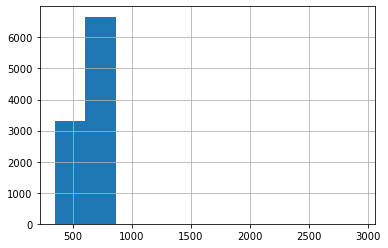

In [134]:
df_bank.CreditScore.hist()

Outliers can't be properly seen as there aren't many. Let's use a boxplot to better identify them.

<AxesSubplot:>

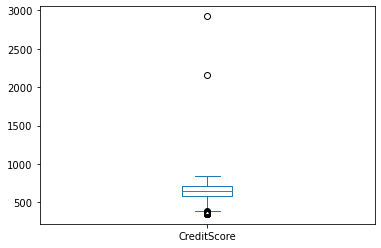

In [135]:
df_bank.CreditScore.plot(kind="box")

In [136]:
df_bank[(df_bank.CreditScore > 850) | (df_bank.CreditScore < 300)]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1553,15776631,2158.510025,France,Female,36.0,5.0,119540.15,1.0,0.0,1.0,80603.99,0
3502,15727619,2924.008649,Germany,Female,46.0,9.0,113909.69,3.0,1.0,0.0,92320.37,1


These 2 outliers seem to have other valuable data that we could use. We will fill the outliers and the nulls with the mean values of the other correct values within the interval

In [137]:
# filling NaN's
creditScore_mean = df_bank[df_bank.CreditScore.between(300, 850)].CreditScore.mean()
df_bank.CreditScore.fillna(creditScore_mean, inplace = True)

In [138]:
# removing outliers by filling in the mean of the creditScore entries with the right values (300, 850)
df_bank.loc[(df_bank.CreditScore > 850) | (df_bank.CreditScore < 300), "CreditScore"] = creditScore_mean

<AxesSubplot:>

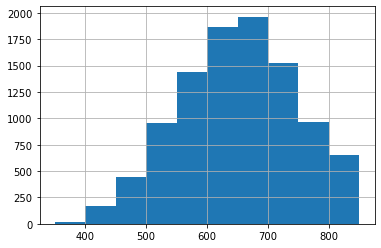

In [139]:
# checking data after outlier removal
df_bank.CreditScore.hist()

<AxesSubplot:>

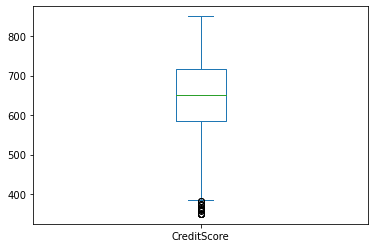

In [140]:
df_bank.CreditScore.plot(kind = "box")

According to the box plot, we may have some suspected outliers below 400 now, but since these are in the margins of the CreditScore definition, we will keep them where they are, at least for now.

#### Column `Geography`

##### Analysis and missing values

`Geography` determines the country where the user lives in. It's a categorical variable with a set of fixed names for each country existing in the world.

In [141]:
df_bank.Geography.value_counts(dropna = False)

France     4924
Germany    2453
Spain      2432
NaN         191
Name: Geography, dtype: int64

<AxesSubplot:>

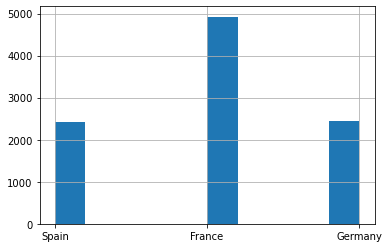

In [142]:
df_bank.Geography.hist()

The data set looks OK for countries France, Germany and Spain. Everything is grouped as it should. However, there are 191 NaN entries.

As there is no way we can input a user to a specific country, we will add a new category for non-reported countries as `Not reported`, so we can remove these NaN's, but use other data for analysis.

In [143]:
# checking the Geographical NaN
df_bank.loc[df_bank.Geography.isna(), "Geography"] = "Not reported"

In [144]:
df_bank.Geography.value_counts(dropna = False)

France          4924
Germany         2453
Spain           2432
Not reported     191
Name: Geography, dtype: int64

<AxesSubplot:>

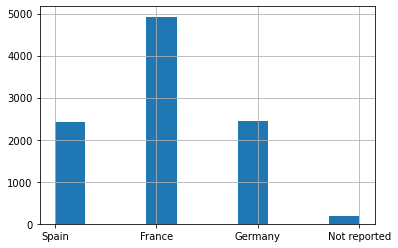

In [145]:
df_bank.Geography.hist()

##### Outliers

No need to review outliers from this categorical variable


#### Column `Gender`

##### Analysis and missing values

`Gender` identifies the gender of the bank customer. It should be a categorical variable with either `Male` or `Female`

In [146]:
df_bank.Gender.value_counts(dropna = False)

Male      5307
Female    4419
NaN        274
Name: Gender, dtype: int64

<AxesSubplot:>

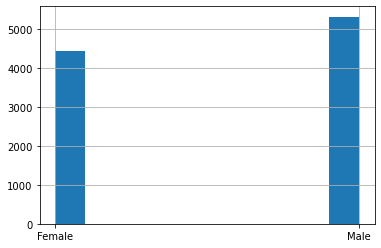

In [147]:
df_bank.Gender.hist()

Same as before, the 2 main categories, `Male` and `Female` are correctly tagged. However, we have several NaN that we can't fill a value in as we don't know the reason behind that. Maybe the customers don't identify themselves with that particular gender, they didn't want to specify it, or in fact, there's been an error when storing the values in the database. We will create a 3rd category calling it `Not specified` and fill all NaN's with it.

In [148]:
df_bank.loc[df_bank.Gender.isna(), "Gender"] = "Not specified"
df_bank.Gender.value_counts(dropna = False)

Male             5307
Female           4419
Not specified     274
Name: Gender, dtype: int64

<AxesSubplot:>

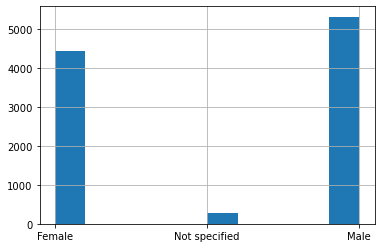

In [149]:
df_bank.Gender.hist()

The Not Specified Gender is a small category but it can't be despised.

##### Outliers

No need to review outliers from this categorical variable

#### Column `Age`

##### Analysis and missing values

`Age` identifies how old the bank customer is. It's a continuous float variable.

In [150]:
df_bank.Age.describe()

count    9746.000000
mean       38.945208
std        10.559595
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

There are negative values in `Age` as specified in the minimum. The max looks quite high too but possible (as people can even live longer than 100 years), we'll know more when analysing the outliers.

In [151]:
# checking for NaN values
df_bank.Age.isna().any()

True

In [152]:
print("There are", df_bank.Age.isna().sum(), "NaN values")

There are 254 NaN values


We'll decide what to do with the values as soon as we check the outliers (which we suspect there are as we have negative ages).

Additionally, something interesting we've noticed is that, even though the age is defined as a float, all entries that are not NaN's have 0s in the decimal positions. So we are dealing with integers instead of floats, as it seems that the data source doesn't have a "less than a year" resolution.

This has its advantages too as we are cleaning the data to train a model for churn analysis because we would expect to analyse churn in bins of ages, for example. ([More info](https://stackoverflow.com/questions/67329095/when-should-you-convert-age-column-in-float-or-int))

In [153]:
df_bank.Age.value_counts(dropna = False)

 37.0    467
 38.0    464
 35.0    463
 36.0    442
 34.0    430
        ... 
 83.0      1
 88.0      1
-23.0      1
 82.0      1
 85.0      1
Name: Age, Length: 73, dtype: int64

In [154]:
df_bank.loc[df_bank.Age.notnull(), "Age"].astype("str").str[-2:].value_counts()

.0    9746
Name: Age, dtype: int64

##### Outliers

Before doing any data transformations, we will check the outliers

<AxesSubplot:>

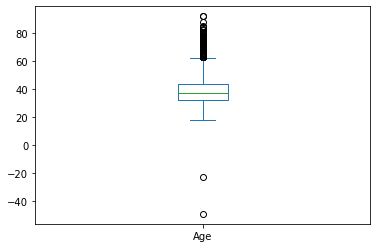

In [155]:
df_bank.Age.plot(kind = "box")

As suspected, the only clear outliers we have are the negative ones. Even though we have values outside the IQR, these could be valuable and thus we can't take the decision to remove them.

In [156]:
age_mean = round(df_bank.Age[df_bank.Age > 0].mean()) # rounding mean as we will convert it to integers instead of floats
age_mean

39

In [157]:
# filling negative ages with age_mean
df_bank.loc[df_bank.Age < 0, "Age"] = age_mean

<AxesSubplot:>

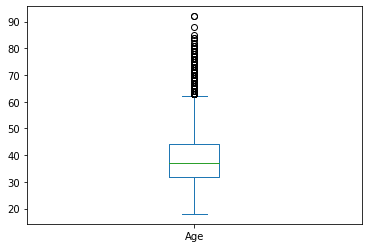

In [158]:
df_bank.Age.plot(kind = "box")

In [159]:
# checking if the minimum age is OK
df_bank.Age.min()

18.0

Since the minimum is now 18 years, the data looks correct. Anything below that age would have been a suspected outlier

In [160]:
# filling in null values
df_bank.Age.fillna(age_mean, inplace = True)

In [161]:
df_bank.Age.isna().any()

False

No null values left.

Now we will convert the float64 values into integers as discussed before. Moreover, we will also convert them to the type `int8` so we can save memory usage too.

The max value for `int8` is `127` which covers all possible ages for a human being, so it's safe to use it (the oldest person ever until year 2021 has been [Jeanne Calment, living up to 122 years](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people)).

In [162]:
df_bank.Age = df_bank.Age.astype("int8")

In [163]:
df_bank.Age.head(5)

0    40
1    34
2    39
3    37
4    37
Name: Age, dtype: int8

#### Column `Tenure`

##### Analysis and missing values

A loan `Tenure`, in banking, is the length of time that will be taken by the borrower to repay the loan along with the interest. Depending on the kind of loan, the tenure can vary. For example, in Spain a house mortgage or loan can max up to 30 years.

[More info on Tenures](https://www.mvorganizing.org/what-does-tenure-mean-in-banking/)

In [164]:
df_bank.Tenure.value_counts(dropna = False)

 2.000000     1039
 1.000000     1024
 7.000000     1022
 8.000000     1017
 3.000000     1006
 5.000000     1002
 4.000000      981
 9.000000      975
 6.000000      959
 10.000000     486
 0.000000      410
 NaN            77
 32.044103       1
-5.000000        1
Name: Tenure, dtype: int64

In [165]:
df_bank.Tenure.describe()

count    9923.000000
mean        5.014617
std         2.905646
min        -5.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: Tenure, dtype: float64

By inspecting the data, it seems that the measurement unit is in years. Plus, we have some nulls that will require pre-processing and some outliers due to negative values and very high values.

We will deal with the NaN's once we remove the outliers and get a proper mean or median.

##### Outliers

From the previous, we identified some outliers that will be removed using similar techniques as before

<AxesSubplot:>

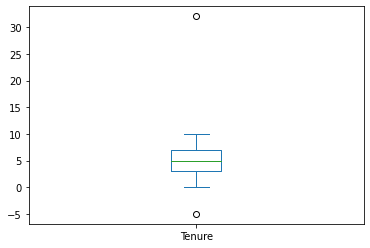

In [166]:
df_bank.Tenure.plot(kind = "box")

In [167]:
df_bank.loc[df_bank.Tenure.notnull(), "Tenure"].astype("str").str[-2:].value_counts()

.0    9922
33       1
Name: Tenure, dtype: int64

Additionally, we face the same issue as with the age, using floats to identify integer based numbers that will be solved too (the `33` are the decimals from the max value identified as the outlier)

In [168]:
# removing negative and very high values with the mean
tenure_mean = round(df_bank.Tenure[(df_bank.Tenure > 0) & (df_bank.Tenure < 30)].mean()) # rounding so we can later convert to int
tenure_mean

5

In [169]:
# filling null values with the mean
df_bank.Tenure.fillna(tenure_mean, inplace = True)

In [170]:
# filling outliers
df_bank.loc[(df_bank.Tenure > 15) | (df_bank.Tenure < 0), "Tenure"] = tenure_mean

<AxesSubplot:>

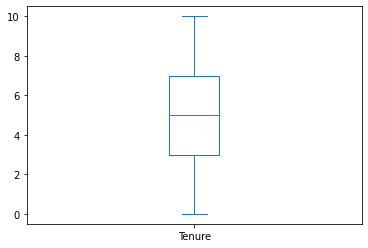

In [171]:
df_bank.Tenure.plot(kind = "box")

<AxesSubplot:>

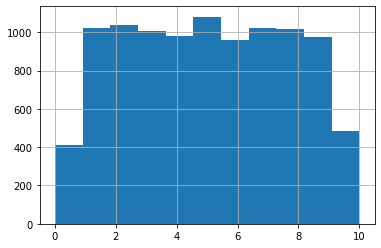

In [172]:
df_bank.Tenure.hist(bins = 11) # using 11 beans to see the values that range from 0 - 10

In [173]:
df_bank.Tenure.value_counts(dropna = False)

5.0     1081
2.0     1039
1.0     1024
7.0     1022
8.0     1017
3.0     1006
4.0      981
9.0      975
6.0      959
10.0     486
0.0      410
Name: Tenure, dtype: int64

In [174]:
# converting data type to int8
df_bank.Tenure = df_bank.Tenure.astype("int8")
df_bank.Tenure.value_counts(dropna = False)

5     1081
2     1039
1     1024
7     1022
8     1017
3     1006
4      981
9      975
6      959
10     486
0      410
Name: Tenure, dtype: int64

In the end, `Tenure` only has 11 possible values, Even if we have integers, these could be treated as a category if we wanted.

#### Column `Balance`

##### Analysis and missing values

`Balance` is the amount of money that the customer has in the bank or that they got from a loan. In the end, this is a continous variable.

In [175]:
df_bank.Balance.describe()

count    9.850000e+03
mean     7.672267e+04
std      6.372769e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.724599e+04
75%      1.276414e+05
max      1.036826e+06
Name: Balance, dtype: float64

In [176]:
df_bank.Balance.value_counts(dropna = False)

0.00         3555
NaN           150
105473.74       2
130170.82       2
116969.35       1
             ... 
100471.34       1
95900.04        1
105301.50       1
87842.98        1
161993.89       1
Name: Balance, Length: 6295, dtype: int64

<AxesSubplot:>

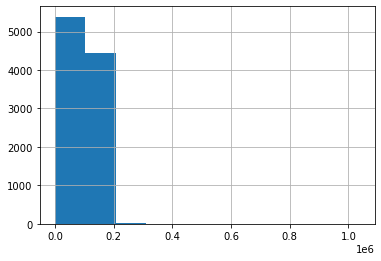

In [177]:
df_bank.Balance.hist()

<AxesSubplot:>

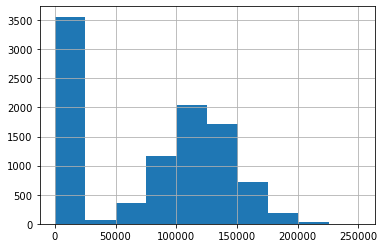

In [178]:
df_bank.Balance[df_bank.Balance < 0.4e6].hist()

By inspecting the values, we don't see nothing weird besides the fact that there are many 0's (the minimum and the fact that we have 3555 entries with 0.00). Before deciding what to do with the nulls, we will inspect the outliers first, just in case.

##### Outliers

<AxesSubplot:>

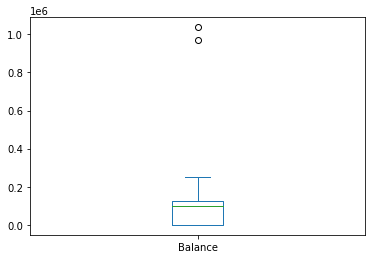

In [179]:
df_bank.Balance.plot(kind = "box")

There are pretty high values that twist the histogram and the boxplot, but the quantities could be right if we inspected both entries (around 1 million). Compared with the other customers these seem to be very rich (or that they owe a lot of money). If we inspect the data further:

In [180]:
df_bank[df_bank.Balance > 0.4e6]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
797,15795540,556.0,France,Female,36,2,1.036826e+06,1.0,0.0,1.0,177670.57,0
4456,15704284,736.0,Germany,Male,57,9,9.697802e+05,1.0,1.0,0.0,28434.44,1


We decided to keep these values and use them as the mean to fill in the null values, as we can't assume for sure that these are true outliers, since these do not affect our mean or median much (only 2 entries), they make no harm

In [181]:
balance_mean = df_bank.Balance.mean()
balance_mean

76722.67177696514

In [182]:
df_bank.Balance.fillna(balance_mean, inplace = True)

#### Column `NumOfProducts`

##### Analysis and missing values

`NumOfProducts` refers to the amount of products that the bank customers have. It should be a cardinal integer variable, which, depending on the amount of values it has, it could be treated as categorical.

In [183]:
df_bank.NumOfProducts.value_counts(dropna = False)

 1.00000     4946
 2.00000     4450
 NaN          285
 3.00000      255
 4.00000       58
-2.00000        3
-1.00000        2
 11.17746       1
Name: NumOfProducts, dtype: int64

We can see the following:
- Values are stored as floats, even though we should be dealing with integers. These will need a conversion to an integer
- Some suspected outliers with negative values
- A suspected outlier in 11.17746, as it looks like an incorrect value when compared to the others
- 285 nulls or missing values that will be treated once we detect and remove the outliers

##### Outliers

<AxesSubplot:>

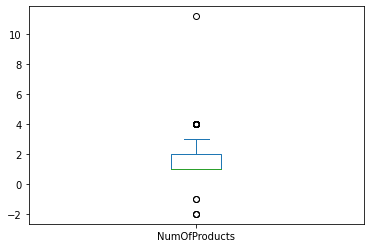

In [184]:
df_bank.NumOfProducts.plot(kind = "box")

Negative values are outliers for sure. The one beyond 10 also looks like one. The number 4 has few but entries so it could be correct, and for the time being we'll keep it

In [185]:
num_of_products_mean = round(df_bank.loc[(df_bank.NumOfProducts > 0) & (df_bank.NumOfProducts < 10), "NumOfProducts"].mean())
num_of_products_mean

2

In [186]:
# fill nulls
df_bank.NumOfProducts.fillna(num_of_products_mean, inplace = True)

In [187]:
# outlier removal
df_bank.loc[(df_bank.NumOfProducts < 0) | (df_bank.NumOfProducts > 10), "NumOfProducts"] = num_of_products_mean

<AxesSubplot:>

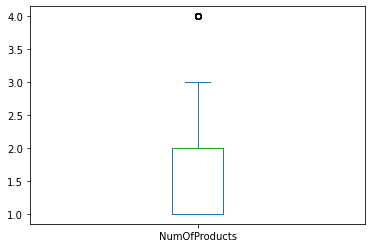

In [188]:
df_bank.NumOfProducts.plot(kind = "box")

In [189]:
# converting all values to int8
df_bank.NumOfProducts = df_bank.NumOfProducts.astype("int8")

In [190]:
df_bank.NumOfProducts.value_counts(dropna = False)

1    4946
2    4741
3     255
4      58
Name: NumOfProducts, dtype: int64

We have from 1 up to 4 products contracted as categories, without the outliers and null values

#### Column `HasCrCard`

##### Analysis and missing values

`HasCrCard` identifies if the bank customer has a credit card or not. It should be a categorical variable with 2 values, `True` and `False`.

In [191]:
df_bank.HasCrCard.value_counts(dropna = False)

1.0    6997
0.0    2924
NaN      79
Name: HasCrCard, dtype: int64

There are 79 Null records that don't allow us to set categories, as we may not be able to assign them to any of these as we can't get this info from anywhere in the DataFrame.

Another option would be to drop the column, but it seems interesting to analyse if the fact of having or not a credit card affects the possibility of customers leaving or not.

In [192]:
df_bank.loc[df_bank.HasCrCard.isna()]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
338,15807245,699.0,Germany,Female,41,1,200117.76,2,NaN,0.0,94142.35,0
482,15803681,803.0,France,Female,26,4,0.00,2,NaN,1.0,181208.47,0
498,15803121,847.0,France,Male,51,5,97565.74,1,NaN,0.0,144184.06,1
806,15795290,767.0,France,Female,42,2,133616.39,1,NaN,0.0,28615.80,0
954,15791972,748.0,France,Female,20,7,0.00,2,NaN,0.0,10792.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9446,15580134,479.0,Spain,Male,27,2,172463.45,1,NaN,1.0,40315.27,0
9579,15576623,584.0,France,Male,31,5,0.00,2,NaN,0.0,31474.27,0
9608,15576022,565.0,France,Male,38,5,0.00,2,NaN,1.0,80630.32,0
9676,15574206,718.0,France,Female,37,7,0.00,2,NaN,1.0,55100.09,0


Can't remove these 79 entries as they contain other valuable fields. Since we can't infer what should be in the null values, we will create a third category with a `Not Reported` value.

In [193]:
df_bank.loc[df_bank.HasCrCard.isna(), "HasCrCard"] = "Not Reported"
df_bank.HasCrCard.value_counts(dropna = False)

1.0             6997
0.0             2924
Not Reported      79
Name: HasCrCard, dtype: int64

A histogram can't be represented unless we convert the values 1 and 0 to an object (string). The ideal would have been to convert 1.0 to True and 0.0 to False, but with those Nulls that we would like to keep it makes sense to turn them into the strings `"Yes"` and `"No"` 

In [194]:
df_bank.loc[df_bank.HasCrCard == 1.0, "HasCrCard"] = "Yes"
df_bank.loc[df_bank.HasCrCard == 0.0, "HasCrCard"] = "No"

<AxesSubplot:>

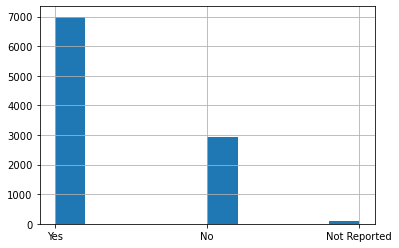

In [195]:
df_bank.HasCrCard.hist()

##### Outliers

No need to analyse outliers for a categorical value

#### Column `IsActiveMember`

##### Analysis and missing values

`IsActiveMember` identifies if a member is active or not. We should need to understand a little bit more what the bank understands as active, but this is something we can't infer from the data. We suspected that this could be related to the fact that the customer was still a customer in the bank, but we believe that the `Exited` field will provide this kind of information, so we can identify churn.

In [196]:
df_bank.IsActiveMember.value_counts(dropna = False)

1.0    5105
0.0    4812
NaN      83
Name: IsActiveMember, dtype: int64

In [198]:
df_bank.loc[df_bank.IsActiveMember.isna()]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
109,15812917,653.0,Spain,Male,35,6,116662.96,2,Yes,NaN,23864.21,0
131,15812470,719.0,France,Male,61,5,0.00,2,No,NaN,29132.43,0
520,15802390,724.0,France,Female,34,2,0.00,2,Yes,NaN,118863.38,0
565,15801395,790.0,France,Female,33,10,135120.72,1,No,NaN,195204.99,0
672,15798895,525.0,France,Female,59,6,55328.40,1,Yes,NaN,83342.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9346,15583026,535.0,France,Female,38,0,135919.33,1,Yes,NaN,80425.65,0
9368,15582259,567.0,France,Female,37,7,0.00,2,Yes,NaN,28690.90,0
9672,15574296,757.0,France,Male,23,2,80673.96,2,Yes,NaN,93991.65,0
9771,15571689,740.0,France,Female,37,5,0.00,2,Yes,NaN,27528.40,0


After inspecting the data, We will apply the same treatment that we applied to `HasCrCard` for the same reasons

In [199]:
df_bank.loc[df_bank.IsActiveMember == 1.0, "IsActiveMember"] = "Yes"
df_bank.loc[df_bank.IsActiveMember == 0.0, "IsActiveMember"] = "No"
df_bank.loc[df_bank.IsActiveMember.isna(), "IsActiveMember"] = "Not Reported"

In [200]:
df_bank.IsActiveMember.value_counts(dropna = False)

Yes             5105
No              4812
Not Reported      83
Name: IsActiveMember, dtype: int64

<AxesSubplot:>

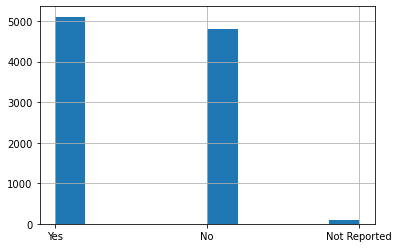

In [201]:
df_bank.IsActiveMember.hist()

##### Outliers

#### Column `EstimatedSalary`

##### Analysis and missing values

##### Outliers

#### Column `Exited`

##### Analysis and missing values

##### Outliers

### 5 - Categorical variables transformation

In [94]:
df_bank.isna().sum()

CustomerId          0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember     83
EstimatedSalary    43
Exited              0
dtype: int64

### 6 - Scaling the data set